# CS 4330 Data Science - Term Project
## Progress Report 2
## Team Bit Blasters

Members:
Will Hennig (whennig@angelo.edu),
Ryan Dewey (rdewey@angelo.edu),
Sonpaorong Muchhim (smuchhim@angelo.edu)

## Set up access to the Barrios ISS dataset

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# change the following folder path to the one shared with you
# flist = os.chdir('drive/shared-with-me/Barrios-ASU - ISS Consumables Data Package/csv')
# dir = '/content/drive/MyDrive/CS 4330 Project - Bit Blasters/Barrios-ASU - ISS Consumables Data Package/csv/'
dir = '/content/drive/MyDrive/Barrios-ASU - ISS Consumables Data Package/csv/'
mainDir = '/content/drive/MyDrive/Barrios-ASU - ISS Consumables Data Package/'
flist = os.listdir(dir) # file list
# type(flist)

# Sort file names
flist.sort()
flist

Mounted at /content/drive


['ims_consumables_category_lookup.csv',
 'inventory_mgmt_system_consumables_20220101-20230905.csv',
 'iss_flight_plan_20220101-20251231.csv',
 'iss_flight_plan_crew_20220101-20251321.csv',
 'iss_flight_plan_crew_nationality_lookup.csv',
 'rates_definition.csv',
 'rsa_consumable_water_summary_20220103-20230828.csv',
 'stored_items_only_inventory_mgmt_system_consumables_20220101-20230905.csv',
 'tank_capacity_definition.csv',
 'thresholds_limits_definition.csv',
 'us_rs_weekly_consumable_gas_summary_20220102-20230903.csv',
 'us_weekly_consumable_water_summary_20220102-20230903.csv',
 'vehicle_capcity_def.csv']

## Read one of the csv files to a dataframe

Column Names

In [ ]:
dataDictHeaderText = '''datedim
id
id_parent
id_path
tree_depth
tree
part_number
serial_number
location_name
original_ip_owner
current_ip_owner
operational_nomenclature
russian_name
english_name
barcode
quantity
width
height
length
diameter
calculated_volume
stwg_ovrrd_vol
children_volume
stwg_ovrrd_chldren_vol
ovrrd_notes
volume_notes
expire_date
launch
type
hazard
state
status
is_container
is_moveable
system
subsystem
action_date
move_date
fill_status
categoryID
category_name'''

dataDictHeaders = dataDictHeaderText.split('\n')
dataDictHeaders


['datedim',
 'id',
 'id_parent',
 'id_path',
 'tree_depth',
 'tree',
 'part_number',
 'serial_number',
 'location_name',
 'original_ip_owner',
 'current_ip_owner',
 'operational_nomenclature',
 'russian_name',
 'english_name',
 'barcode',
 'quantity',
 'width',
 'height',
 'length',
 'diameter',
 'calculated_volume',
 'stwg_ovrrd_vol',
 'children_volume',
 'stwg_ovrrd_chldren_vol',
 'ovrrd_notes',
 'volume_notes',
 'expire_date',
 'launch',
 'type',
 'hazard',
 'state',
 'status',
 'is_container',
 'is_moveable',
 'system',
 'subsystem',
 'action_date',
 'move_date',
 'fill_status',
 'categoryID',
 'category_name']

In [ ]:
dfBigBoy = pd.read_csv(dir + flist[1], names=dataDictHeaders) # 'inventory_mgmt_system_consumables_20220101-20230905.csv'
dfBigBoy

,datedim,id,id_parent,id_path,tree_depth,tree,part_number,serial_number,location_name,original_ip_owner,...,status,is_container,is_moveable,system,subsystem,action_date,move_date,fill_status,categoryID,category_name
0,2022-01-01 10:01:08.690,364155,265,/0/101/265/364155/,3,Storage Location,11Ф615.8720А55-20,1180,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.180,2020-10-10 19:22:04.180,NaN,3,KTO
1,2022-01-01 10:01:08.690,364156,265,/0/101/265/364156/,3,Storage Location,11Ф615.8720А55-20,1181,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.300,2020-10-10 19:22:04.300,NaN,3,KTO
2,2022-01-01 10:01:08.690,364157,265,/0/101/265/364157/,3,Storage Location,11Ф615.8720А55-20,1182,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.263,2020-10-10 19:22:04.263,NaN,3,KTO
3,2022-01-01 10:01:08.690,364158,265,/0/101/265/364158/,3,Storage Location,11Ф615.8720А55-10,1182,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.250,2020-10-10 19:22:04.250,NaN,3,KTO
4,2022-01-01 10:01:08.690,364160,265,/0/101/265/364160/,3,Storage Location,11Ф615.8720А55-20,1184,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.290,2020-10-10 19:22:04.290,NaN,3,KTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5790364,2023-09-05 15:20:48.003,409492,294523,/99/294510/294513/294523/409492/,4,Trash,SEG48102042-901,GO754,Trash,NASA,...,Stowed,1,1,Food Supply,NaN,2021-06-03 09:02:52.670,2021-05-25 15:23:13.033,NaN,6,Food-US
5790365,2023-09-05 15:20:48.003,409493,294523,/99/294510/294513/294523/409493/,4,Trash,SEG48102042-901,GO686,Trash,NASA,...,Stowed,1,1,Food Supply,NaN,2021-06-03 09:01:21.467,2021-05-25 15:21:06.393,NaN,6,Food-US
5790366,2023-09-05 15:20:48.003,404856,99,/99/404856/,1,Trash,11Ф615.8720А55-20,NA_01272021,Trash,NASA,...,Installed,1,1,ECLSS,WHC,2021-01-27 15:56:55.287,2021-01-27 15:56:55.287,NaN,3,KTO
5790367,2023-09-05 15:20:48.003,404857,404856,/99/404856/404857/,2,Trash,11Ф615.8720А55-10,NA_01272021,Trash,NASA,...,Installed,1,1,ECLSS,WHC,2021-01-27 13:08:34.630,2021-01-27 13:08:34.630,NaN,3,KTO


In [ ]:
dfBigBoy[['id','quantity']].value_counts() #(Sonpaorong Muchhim)

id      quantity
385     1           550
151195  1           550
152503  1           550
152502  1           550
152501  1           550
                   ... 
157892  1             1
157891  1             1
157890  1             1
157844  1             1
157893  1             1
Name: count, Length: 13879, dtype: int64

Spliting the 'datedim' into 'date' to scale it into timeline graph by day

In [ ]:
result = dfBigBoy['datedim'].str.split(' ', expand=True) #Trying to split the data in 'datedim' to 'date' and 'time' to group the quantity list into timeline graph by date (Sonpaorong Muchhim)
result.columns = ['date', 'time']

In [ ]:
result.columns # verifying (Will Hennig)
result

,date,time
0,2022-01-01,10:01:08.690
1,2022-01-01,10:01:08.690
2,2022-01-01,10:01:08.690
3,2022-01-01,10:01:08.690
4,2022-01-01,10:01:08.690
...,...,...
5790364,2023-09-05,15:20:48.003
5790365,2023-09-05,15:20:48.003
5790366,2023-09-05,15:20:48.003
5790367,2023-09-05,15:20:48.003


In [ ]:
position_to_insert = dfBigBoy.columns.get_loc('datedim') #(Sonpaorong Muchhim)
dfBigBoy.insert(position_to_insert + 1, 'date', result['date'])
dfBigBoy.insert(position_to_insert + 2, 'time', result['time']) #(Sonpaorong Muchhim)

# drop datedim (W. Hennig)
dfBigBoy.drop('datedim', axis=1)

,date,time,id,id_parent,id_path,tree_depth,tree,part_number,serial_number,location_name,...,status,is_container,is_moveable,system,subsystem,action_date,move_date,fill_status,categoryID,category_name
0,2022-01-01,10:01:08.690,364155,265,/0/101/265/364155/,3,Storage Location,11Ф615.8720А55-20,1180,ФГБ1ГА,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.180,2020-10-10 19:22:04.180,NaN,3,KTO
1,2022-01-01,10:01:08.690,364156,265,/0/101/265/364156/,3,Storage Location,11Ф615.8720А55-20,1181,ФГБ1ГА,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.300,2020-10-10 19:22:04.300,NaN,3,KTO
2,2022-01-01,10:01:08.690,364157,265,/0/101/265/364157/,3,Storage Location,11Ф615.8720А55-20,1182,ФГБ1ГА,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.263,2020-10-10 19:22:04.263,NaN,3,KTO
3,2022-01-01,10:01:08.690,364158,265,/0/101/265/364158/,3,Storage Location,11Ф615.8720А55-10,1182,ФГБ1ГА,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.250,2020-10-10 19:22:04.250,NaN,3,KTO
4,2022-01-01,10:01:08.690,364160,265,/0/101/265/364160/,3,Storage Location,11Ф615.8720А55-20,1184,ФГБ1ГА,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.290,2020-10-10 19:22:04.290,NaN,3,KTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5790364,2023-09-05,15:20:48.003,409492,294523,/99/294510/294513/294523/409492/,4,Trash,SEG48102042-901,GO754,Trash,...,Stowed,1,1,Food Supply,NaN,2021-06-03 09:02:52.670,2021-05-25 15:23:13.033,NaN,6,Food-US
5790365,2023-09-05,15:20:48.003,409493,294523,/99/294510/294513/294523/409493/,4,Trash,SEG48102042-901,GO686,Trash,...,Stowed,1,1,Food Supply,NaN,2021-06-03 09:01:21.467,2021-05-25 15:21:06.393,NaN,6,Food-US
5790366,2023-09-05,15:20:48.003,404856,99,/99/404856/,1,Trash,11Ф615.8720А55-20,NA_01272021,Trash,...,Installed,1,1,ECLSS,WHC,2021-01-27 15:56:55.287,2021-01-27 15:56:55.287,NaN,3,KTO
5790367,2023-09-05,15:20:48.003,404857,404856,/99/404856/404857/,2,Trash,11Ф615.8720А55-10,NA_01272021,Trash,...,Installed,1,1,ECLSS,WHC,2021-01-27 13:08:34.630,2021-01-27 13:08:34.630,NaN,3,KTO


In [ ]:
dfBigBoy['date'].nunique()

544

In [ ]:
dfBigBoy['id'].nunique()

13879

In [ ]:
# dfBigBoy.drop_duplicates(subset=['id']).groupby('id').max().to_csv('unique_id_first_occurrence.csv')
unique_id_df = dfBigBoy.drop_duplicates(subset=['id'])


In [ ]:
unique_id_df

,datedim,date,time,id,id_parent,id_path,tree_depth,tree,part_number,serial_number,...,status,is_container,is_moveable,system,subsystem,action_date,move_date,fill_status,categoryID,category_name
0,2022-01-01 10:01:08.690,2022-01-01,10:01:08.690,364155,265,/0/101/265/364155/,3,Storage Location,11Ф615.8720А55-20,1180,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.180,2020-10-10 19:22:04.180,NaN,3,KTO
1,2022-01-01 10:01:08.690,2022-01-01,10:01:08.690,364156,265,/0/101/265/364156/,3,Storage Location,11Ф615.8720А55-20,1181,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.300,2020-10-10 19:22:04.300,NaN,3,KTO
2,2022-01-01 10:01:08.690,2022-01-01,10:01:08.690,364157,265,/0/101/265/364157/,3,Storage Location,11Ф615.8720А55-20,1182,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.263,2020-10-10 19:22:04.263,NaN,3,KTO
3,2022-01-01 10:01:08.690,2022-01-01,10:01:08.690,364158,265,/0/101/265/364158/,3,Storage Location,11Ф615.8720А55-10,1182,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.250,2020-10-10 19:22:04.250,NaN,3,KTO
4,2022-01-01 10:01:08.690,2022-01-01,10:01:08.690,364160,265,/0/101/265/364160/,3,Storage Location,11Ф615.8720А55-20,1184,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.290,2020-10-10 19:22:04.290,NaN,3,KTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5737259,2023-09-02 06:45:01.880,2023-09-02,06:45:01.880,502048,501878,/2/501876/501877/501878/502048/,4,Launch,17КС.260Ю 3200-0,7171,...,Stowed,1,1,SM Food Supply System,NaN,2023-08-30 10:08:05.850,2023-08-30 10:08:05.850,NaN,7,Food-RS
5737260,2023-09-02 06:45:01.880,2023-09-02,06:45:01.880,502049,501878,/2/501876/501877/501878/502049/,4,Launch,17КС.260Ю 3200-0,7169,...,Stowed,1,1,SM Food Supply System,NaN,2023-08-30 10:08:05.900,2023-08-30 10:08:05.900,NaN,7,Food-RS
5737261,2023-09-02 06:45:01.880,2023-09-02,06:45:01.880,502050,501878,/2/501876/501877/501878/502050/,4,Launch,17КС.260Ю 3200-0,7163,...,Stowed,1,1,SM Food Supply System,NaN,2023-08-30 10:08:05.940,2023-08-30 10:08:05.940,NaN,7,Food-RS
5737262,2023-09-02 06:45:01.880,2023-09-02,06:45:01.880,502051,501878,/2/501876/501877/501878/502051/,4,Launch,17КС.260Ю 3200-0,7161,...,Stowed,1,1,SM Food Supply System,NaN,2023-08-30 10:08:05.987,2023-08-30 10:08:05.987,NaN,7,Food-RS


## General Dataset Information

In [ ]:
dfBigBoy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5790369 entries, 0 to 5790368
Data columns (total 43 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   datedim                   object 
 1   date                      object 
 2   time                      object 
 3   id                        int64  
 4   id_parent                 int64  
 5   id_path                   object 
 6   tree_depth                int64  
 7   tree                      object 
 8   part_number               object 
 9   serial_number             object 
 10  location_name             object 
 11  original_ip_owner         object 
 12  current_ip_owner          object 
 13  operational_nomenclature  object 
 14  russian_name              object 
 15  english_name              object 
 16  barcode                   object 
 17  quantity                  int64  
 18  width                     float64
 19  height                    float64
 20  length                  

 Count all entries by column & category

In [ ]:
categorical_columns = ['location_name', 'original_ip_owner', 'current_ip_owner',
                       'operational_nomenclature', 'russian_name', 'english_name',
                       'type', 'hazard', 'state', 'status', 'is_container',
                       'is_moveable', 'system', 'subsystem', 'category_name']

for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(dfBigBoy[column].value_counts())
    print("\n")


Value counts for location_name:
ReturnedCYG9          219066
ReturnedCYG15_DPLY    167718
ReturnedCYG17_DPLY    157733
ReturnedCYG16_DPLY    119887
ReturnedCYG10         108821
                       ...  
NOD3A1                     1
DRA25_MF22                 1
DRA28_US12                 1
DRA26_UP12                 1
LAB1_Deployed              1
Name: location_name, Length: 1108, dtype: int64


Value counts for original_ip_owner:
NASA                    3502968
Russian Space Agency    2287401
Name: original_ip_owner, dtype: int64


Value counts for current_ip_owner:
NASA     3468365
RSA00    2322004
Name: current_ip_owner, dtype: int64


Value counts for operational_nomenclature:
Food BOB                                  2266070
КРП                                       1041032
Корпус КТО                                 378291
Днище КТО                                  375476
Solid Waste Container - Lid                319378
Solid Waste Container - Body               318507
Вкладыши

In [ ]:
dfBigBoy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5790369 entries, 0 to 5790368
Data columns (total 43 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   datedim                   object 
 1   date                      object 
 2   time                      object 
 3   id                        int64  
 4   id_parent                 int64  
 5   id_path                   object 
 6   tree_depth                int64  
 7   tree                      object 
 8   part_number               object 
 9   serial_number             object 
 10  location_name             object 
 11  original_ip_owner         object 
 12  current_ip_owner          object 
 13  operational_nomenclature  object 
 14  russian_name              object 
 15  english_name              object 
 16  barcode                   object 
 17  quantity                  int64  
 18  width                     float64
 19  height                    float64
 20  length                  

In [ ]:
dfBigBoy.describe(include='all')

,datedim,date,time,id,id_parent,id_path,tree_depth,tree,part_number,serial_number,...,status,is_container,is_moveable,system,subsystem,action_date,move_date,fill_status,categoryID,category_name
count,5790369,5790369,5790369,5.790369e+06,5.790369e+06,5790369,5.790369e+06,5790369,5790369,5790369,...,5785966,5.790369e+06,5790369.0,5709839,2098556,5790369,5790369,1048427,5.790369e+06,5790369
unique,551,544,542,NaN,NaN,31295,NaN,5,9,11765,...,4,NaN,NaN,7,4,25063,22311,2,NaN,8
top,2023-09-02 06:45:01.880,2023-06-09,07:15:01.993,NaN,NaN,/3/12543/421274/421327/421363/421369/356462/38...,NaN,Return,SEG48102042-901,1215,...,Discard,NaN,NaN,Food Supply,АсСУ,2022-03-17 16:08:58.857,2004-05-13 11:09:55.000,EMPTY,NaN,KTO
freq,13621,79626,40080,NaN,NaN,550,NaN,5182873,2363080,1923,...,4672498,NaN,NaN,2434296,1206976,1428,2070,938060,NaN,1401552
mean,NaN,NaN,NaN,2.328185e+05,2.491095e+05,NaN,4.563674e+00,NaN,NaN,NaN,...,NaN,9.264769e-01,1.0,NaN,NaN,NaN,NaN,NaN,5.158601e+00,NaN
std,NaN,NaN,NaN,1.415258e+05,1.489893e+05,NaN,1.582816e+00,NaN,NaN,NaN,...,NaN,2.609933e-01,0.0,NaN,NaN,NaN,NaN,NaN,1.599817e+00,NaN
min,NaN,NaN,NaN,3.850000e+02,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,...,NaN,0.000000e+00,1.0,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN
25%,NaN,NaN,NaN,1.192310e+05,1.281980e+05,NaN,3.000000e+00,NaN,NaN,NaN,...,NaN,1.000000e+00,1.0,NaN,NaN,NaN,NaN,NaN,3.000000e+00,NaN
50%,NaN,NaN,NaN,2.257300e+05,2.303290e+05,NaN,4.000000e+00,NaN,NaN,NaN,...,NaN,1.000000e+00,1.0,NaN,NaN,NaN,NaN,NaN,6.000000e+00,NaN
75%,NaN,NaN,NaN,3.555600e+05,3.802710e+05,NaN,5.000000e+00,NaN,NaN,NaN,...,NaN,1.000000e+00,1.0,NaN,NaN,NaN,NaN,NaN,6.000000e+00,NaN


Using groupBy

In [ ]:
dfBigBoy.groupby('hazard').count()

In [ ]:
dfBigBoy[dfBigBoy['categoryID'] == 1]

In [ ]:
dfBigBoy[dfBigBoy['fill_status'] == 'FULL']

In [ ]:
dfBigBoy[(dfBigBoy['categoryID'] == 1) & (dfBigBoy['status'] == 'Installed')][['date','id','quantity', 'width','height','length','diameter','calculated_volume','volume_notes','status', 'fill_status']].to_csv('installed_edv.csv')

In [ ]:
dfBigBoy[(dfBigBoy['categoryID'] == 1) & (dfBigBoy['id'] == 297243)][['date','id','quantity', 'width','height','length','diameter','calculated_volume','volume_notes','status', 'fill_status']].groupby('status').count()

In [ ]:
dfBigBoy[dfBigBoy['categoryID'] == 2][['id', 'quantity', 'width','height','length','diameter','calculated_volume','volume_notes','status', 'fill_status']]

In [ ]:
dfBigBoy[dfBigBoy['categoryID'] == 3][['id', 'quantity', 'width','height','length','diameter','calculated_volume','volume_notes','status', 'fill_status']]

In [ ]:
dfBigBoy[dfBigBoy['categoryID'] == 4][['id', 'quantity', 'width','height','length','diameter','calculated_volume','volume_notes','status', 'fill_status']]

In [ ]:
dfBigBoy[dfBigBoy['categoryID'] == 5][['id', 'quantity', 'width','height','length','diameter','calculated_volume','volume_notes','status', 'fill_status']]

In [ ]:
dfBigBoy[dfBigBoy['categoryID'] == 5][['id', 'quantity', 'width','height','length','diameter','calculated_volume','volume_notes','status', 'fill_status']].groupby('id').count()[dfBigBoy['id'] == 325415]

In [ ]:
dfBigBoy[dfBigBoy['id'] == 325415].groupby('status').count()

In [ ]:
dfBigBoy[dfBigBoy['categoryID'] == 6][['id', 'quantity', 'width','height','length','diameter','calculated_volume','volume_notes', 'state', 'status', 'fill_status']]

In [ ]:
dfBigBoy[dfBigBoy['categoryID'] == 6][['id', 'quantity', 'width','height','length','diameter','calculated_volume','volume_notes','status', 'fill_status']].groupby('status').count()

In [ ]:
dfBigBoy[dfBigBoy['categoryID'] == 7][['id', 'quantity', 'width','height','length','diameter','calculated_volume','volume_notes','status', 'fill_status']]

In [ ]:
dfBigBoy[dfBigBoy['categoryID'] == 1].groupby('quantity').count()

In [ ]:
dfBigBoy[dfBigBoy['categoryID'] == 1].groupby('status').count()

In [ ]:
dfBigBoy[dfBigBoy['categoryID'] == 1].groupby('id').count()

In [ ]:
dfBigBoy[dfBigBoy['categoryID'] == 1 & ].groupby('quantity').count()

In [ ]:
dfBigBoy[dfBigBoy['categoryID'] == 1].groupby('fill_status').count()

In [ ]:
dfBigBoy[dfBigBoy['categoryID'] == 2]

NameError: name 'plt' is not defined

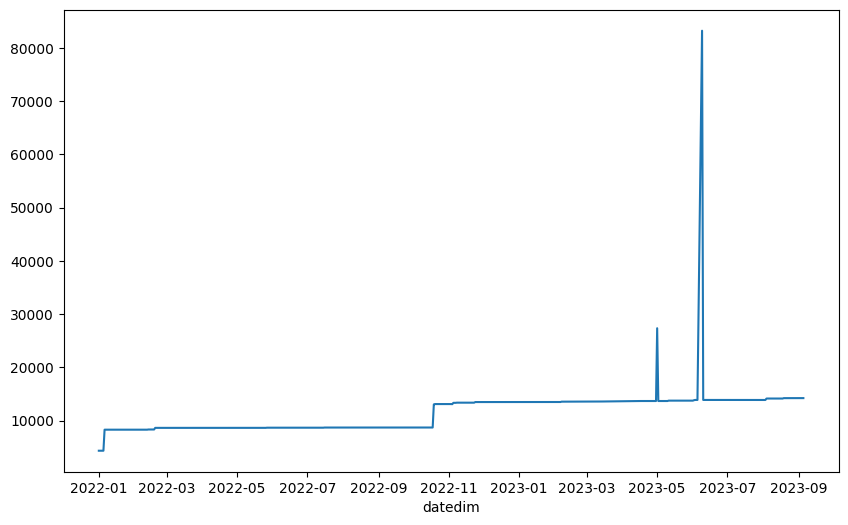

In [ ]:
# Ensure 'datedim' is a datetime type
dfBigBoy['datedim'] = pd.to_datetime(dfBigBoy['datedim'])

# Group by date and sum the quantity
depletion_rate = dfBigBoy.groupby(dfBigBoy['datedim'].dt.date)['quantity'].sum()

# Plotting
depletion_rate.plot(kind='line', figsize=(10, 6))
plt.title('Depletion Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Consumed')
plt.grid(True)
plt.show()

In [ ]:
 print(dfBigBoy.describe()) # Summary statistics for numeric columns Ryan Dewey

                 id     id_parent    tree_depth      quantity         width  \
count  5.790369e+06  5.790369e+06  5.790369e+06  5.790369e+06  4.502409e+06   
mean   2.328185e+05  2.491095e+05  4.563674e+00  1.052273e+00  2.832383e+02   
std    1.415258e+05  1.489893e+05  1.582816e+00  1.545989e+00  6.723495e+01   
min    3.850000e+02  1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    1.192310e+05  1.281980e+05  3.000000e+00  1.000000e+00  3.048000e+02   
50%    2.257300e+05  2.303290e+05  4.000000e+00  1.000000e+00  3.048000e+02   
75%    3.555600e+05  3.802710e+05  5.000000e+00  1.000000e+00  3.050000e+02   
max    5.021180e+05  5.019760e+05  1.100000e+01  5.000000e+01  7.747000e+02   

             height        length      diameter  calculated_volume  \
count  5.202145e+06  4.971070e+06  1.526360e+06       5.622428e+06   
mean   2.025962e+02  2.810997e+02  2.568054e+02       2.802559e-01   
std    1.328272e+02  1.204729e+02  1.256267e+02       2.370505e-01   
min    0

In [ ]:
# print(dfBigBoy.isnull().sum()) # Check for missing values Ryan Dewey

## Graphs Of The Categorical Data and Frequency

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

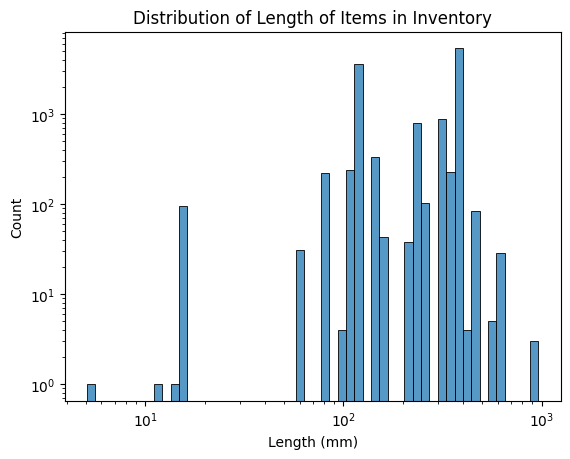

In [ ]:
sns.histplot(x='length', data=unique_id_df, log_scale=True).set(title='Distribution of Length of Items in Inventory', xlabel='Length (mm)')
plt.yscale('log')

[Text(0.5, 1.0, 'Distribution of Length of Items in Inventory'),
 Text(0.5, 0, 'Length (mm)')]

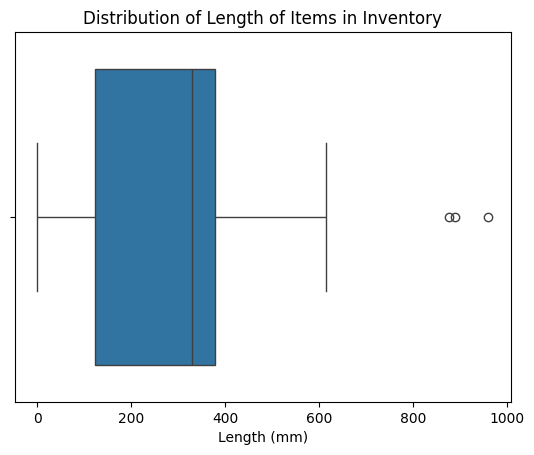

In [ ]:
sns.boxplot(x='length', data=unique_id_df).set(title='Distribution of Length of Items in Inventory', xlabel='Length (mm)')
# plt.yscale('log')

Median value around 350 mm. Interquartile range from 160-380 mm. Range from 0-600mm, outliers around 900mm.

[Text(0.5, 1.0, 'KDE Plot of Length of Items in Inventory'),
 Text(0.5, 0, 'Length (mm)')]

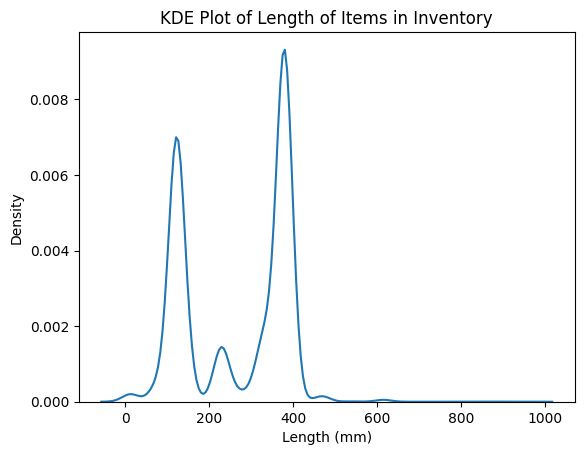

In [ ]:
sns.kdeplot(x='length', data=unique_id_df).set(title='KDE Plot of Length of Items in Inventory', xlabel='Length (mm)')

Clusters around 150mm, just over 200mm, and about 400mm.

[Text(0.5, 1.0, 'Violin Plot of Length of Items in Inventory'),
 Text(0.5, 0, 'Length (mm)')]

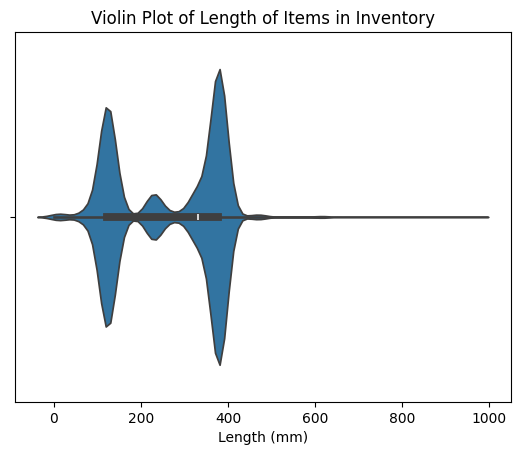

In [ ]:
sns.violinplot(x='length', data=unique_id_df).set(title='Violin Plot of Length of Items in Inventory', xlabel='Length (mm)')
# plt.yscale('log')

Median around 350-375, but another large cluster around the end of interquartile range.

In [ ]:
sns.histplot(x='width', data=unique_id_df).set(title='Distribution of Width of Items in Inventory', xlabel='Width (mm)')
# plt.yscale('log')

[Text(0.5, 1.0, 'Distribution of Width of Items in Inventory'),
 Text(0.5, 0, 'Width (mm)')]

Not sure why it didn't want to plot.

In [ ]:
sns.histplot(x='height', data=unique_id_df,).set(title='Distribution of Height of Items in Inventory', xlabel='Height (mm)')
plt.yscale('log')

Trimodal, with small peak in between, natural outliers at 800mm

In [ ]:
sns.countplot(x='category_name', data=unique_id_df).set(title='Distribution of Categories of Items in Inventory')
plt.xticks(rotation=90, ha='right')

Most items are food and KTOs, which makes sense as they need to be replenished more frequently. Consider looking at the usage rates for these items more specifically!

In [ ]:
sns.countplot(x='operational_nomenclature', data=unique_id_df).set(title='Count of Different Types of Items in Inventory')
plt.xticks(rotation=90, ha='right')
plt.yscale('log')
# plt.figure(figsize=(200,7))

Can't read some of these Russian names, but the most common items appear to be solid waste containers and related items.

In [ ]:
sns.histplot(x='diameter', data=unique_id_df,).set(title='Distribution of Length of Items in Inventory', xlabel='Height (mm)')
# plt.yscale('log')

In [ ]:
sns.histplot(x='calculated_volume', data=unique_id_df).set(title='Distribution of Volume of Items in Inventory', xlabel='Calculated Volume (CTBe)')
# plt.autoscale(enable=True, axis='both', tight=True)

Unsure why nothing shows except a few small peaks. Probably due to errors in evaluating width?

In [ ]:
unique_id_df.hist()

Attempted to plot all histograms (Don't know how to reset!)

In [ ]:
unique_id_df.boxplot()

In [ ]:
try:
  # pd.plotting.scatter_matrix(unique_id_df)
  plt.rcParams.update({'font.size': 14})
  p = sns.pairplot(unique_id_df)
except ValueError:
  pass

## Some Depletion Rate Calculations

In [ ]:
dfBigBoy.set_index('datedim')['quantity'].resample('M').sum().plot() # Depletion Rate of Consumed Items Graph
plt.title('Depletion Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Consumed')
plt.show()

In [ ]:
# Ensure 'datedim' is a datetime type
dfBigBoy['datedim'] = pd.to_datetime(dfBigBoy['datedim'])

# Group by date and sum the quantity
depletion_rate = dfBigBoy.groupby(dfBigBoy['datedim'].dt.date)['quantity'].sum()

depletion_rate

# Plotting
depletion_rate.plot(kind='line', figsize=(10, 6))
plt.title('Depletion Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Consumed')
plt.grid(True)
plt.show()

In [ ]:
depletion_rate

In [ ]:
# dir + flist[7]
# 'stored_items_only_inventory_mgmt_system_consumables_20220101-20230905.csv'

stowables = pd.read_csv(dir + flist[7])
stowables

# dfBigBoy = pd.read_csv(dir + flist[1], names=dataDictHeaders) # 'inventory_mgmt_system_consumables_20220101-20230905.csv'
# dfBigBoy

In [ ]:
result1 = stowables['datedim'].str.split(' ', expand=True) #Trying to split the data in 'datedim' to 'date' and 'time' to group the quantity list into timeline graph by date (Sonpaorong Muchhim)
result1.columns = ['date', 'time']

In [ ]:
position_to_insert1 = stowables.columns.get_loc('datedim') #(Sonpaorong Muchhim)
stowables.insert(position_to_insert1 + 1, 'date', result1['date'])
stowables.insert(position_to_insert1 + 2, 'time', result1['time']) #(Sonpaorong Muchhim)

# drop datedim (W. Hennig)
stowables.drop('datedim', axis=1)

In [ ]:
stowables['datedim'][0]

In [ ]:
stowables['date'] = pd.to_datetime(stowables['date'], format='%m/%d/%Y')
stowables['date'] = stowables['date'].dt.strftime('%Y/%m/%d')

In [ ]:
stowables['status']

In [ ]:
stowables.groupby('date').count()

In [ ]:
stowables.groupby('status').count()

In [ ]:
pd.pivot_table(stowables, index='date', columns='status')

In [ ]:
# stowables.groupby('date')[stowables['status'] == 'Stowed'].count()
stowables['status'][:100]

In [ ]:
stowableCount = stowables[stowables['status'] == "Stowed"].groupby('date').count()['status']

In [ ]:
stowableCount

In [ ]:
stowableCount.size

In [ ]:
# new_depletion_rate = stowables.groupby(stowables['date'])['status'].sum()

stowableCount.plot(kind='line', figsize=(10, 6))
plt.title('Depletion Rate Over Time of All Stowables')
plt.xlabel('Date')
plt.ylabel('Total Quantity Left in Stowage')
plt.grid(True)
plt.show()

This here is calculated from the stowables subset of the inventory database. It is calculated from finding the number of items cataloged as "Stowed" for every day. Discrepancies found after 2023/02/22 and 2023/07/24. Will need to manually look at these entries to make sure they are addressed!

In [ ]:
numerical_columns = []
for column in dfBigBoy.columns:
    # print(column)
    if dfBigBoy[column].dtype == 'float64' or dfBigBoy[column].dtype == 'int64':
      numerical_columns.append(column)

In [ ]:
# numerical_columns

In [ ]:
# dfBigBoy.to_csv('inventory_mgmt_system_consumables_20220101-20230905_v2.csv', index=False) # just to save work

Of the numerical data listed, the ones that are statistically signficant are quantity, width, height, length, diameter, calculated volume.

In [ ]:
# columns1 = ['quantity', 'width', 'height', 'length', 'diameter', 'calculated_volume']

In [ ]:
# preprocessing.scale(df[columns1])

In [ ]:
'''
for currColumn in columns1:
  # preprocessing.scale(df[[currColumn]])
  sns.countplot(x=currColumn,data=dfBigBoy)
'''

In [ ]:
#sns.histplot(x='quantity',data=dfBigBoyNumerical)

In [ ]:
#dfBigBoyNumerical['id'].value_counts()

In [ ]:
#pd.set_option('display.max_rows', None)
#dfBigBoyNumerical[dfBigBoyNumerical['id'] == 364156]

#pd.reset_option('^display.', silent=True)

In [ ]:
#dfBigBoyNumerical[dfBigBoyNumerical['id'] == 364156]

In [ ]:
#dfBigBoyNumerical[dfBigBoyNumerical['id'] == 364156]['calculated_volume']

In [ ]:
#dfBigBoyNumerical[dfBigBoyNumerical['id'] == 364156]['calculated_volume'].value_counts()

In [ ]:
#dfBigBoyNumerical[dfBigBoyNumerical['id'] == 364156]['quantity'].value_counts()

In [ ]:
'''
for myColumn in dfBigBoyNumerical.columns:
  # print(myColumn, type(myColumn))
  print(myColumn)
  print(dfBigBoyNumerical[dfBigBoyNumerical['id'] == 364156][myColumn].value_counts())
  print()
'''

## Regression Models

In [ ]:
# Example filtering step - adjust according to your specific use case
filtered_df = dfBigBoy[dfBigBoy['category_name'] == 'Food-US']

# Check if filtering leaves the DataFrame empty
if filtered_df.empty:
    print("No records match the filtering criteria.")
else:
    print("Filtered DataFrame is not empty.")


Filtered DataFrame is not empty.


In [ ]:
print(dfBigBoy['category_name'].unique())


['KTO' 'EDV' 'ACY Inserts' 'Pretreat Tanks' 'Filter Inserts' 'Food'
 'Food-RS' 'Food-US']


In [ ]:
print(dfBigBoy['Flight Plan Vehicles'].unique())

In [ ]:
# This will print unique category names alongside their IDs
for cid in dfBigBoy['categoryID'].unique():
    cname = dfBigBoy[dfBigBoy['categoryID'] == cid]['category_name'].iloc[0]
    print(f"Category ID {cid}: {cname}")


Category ID 3: KTO
Category ID 1: EDV
Category ID 4: ACY Inserts
Category ID 2: Pretreat Tanks
Category ID 5: Filter Inserts
Category ID 6: Food
Category ID 7: Food-RS


Mean Squared Error: 0.0


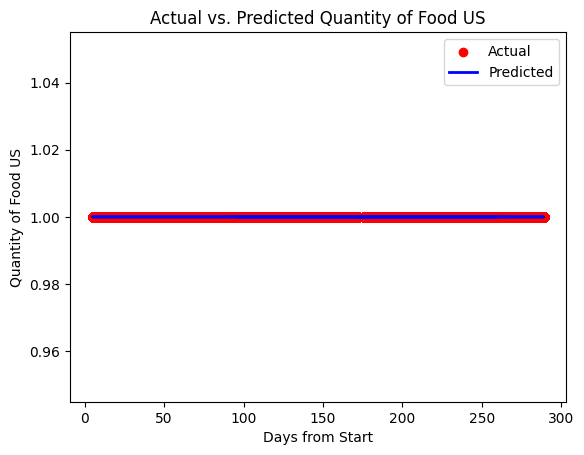

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert 'datedim' to datetime and then to a numerical format (e.g., days since the start)
dfBigBoy['date_numeric'] = (pd.to_datetime(dfBigBoy['datedim']) - pd.to_datetime(dfBigBoy['datedim']).min()).dt.days

# Assuming 'Food US' is a value in 'category_name'
food_us_df = dfBigBoy[dfBigBoy['category_name'] == 'Food']

# Selecting features and target
X = food_us_df[['date_numeric']]  # Consider adding more features here
y = food_us_df['quantity']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualization
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.plot(X_test, y_pred, color='blue', label='Predicted', linewidth=2)
plt.xlabel('Days from Start')
plt.ylabel('Quantity of Food US')
plt.title('Actual vs. Predicted Quantity of Food US')
plt.legend()
plt.show()


Understanding the Process:
Data Preparation:

The datedim column, which represents dates, is converted into a numerical format named date_numeric. This numerical format represents the number of days since the earliest date in the dataset. This step is crucial because linear regression requires numerical inputs.
Model Setup:

The prepared date_numeric serves as the independent variable (X), and the quantity of items acts as the dependent variable (y). The goal is to predict how quantity changes over time.
The dataset is divided into training and testing sets, with 80% of the data used for training the model and the remaining 20% for testing its predictions. This split helps in evaluating the model's performance on unseen data.
Model Training and Prediction:

A linear regression model is then trained on the training set. This model learns the relationship between the time (in days) and the quantity of inventory actions.
Using the trained model, predictions are made on the test set.
Evaluation:

The model's predictions are evaluated against the actual values using the Mean Squared Error (MSE) metric. MSE provides a measure of the model's accuracy by averaging the squares of the differences between predicted and actual values. Lower MSE values indicate better model performance.
Visualization:

The results are visualized in a scatter plot, showing actual quantities versus predicted quantities over time. This visualization helps in understanding how well the model's predictions align with the actual data.
Key Takeaways:
Linear Relationship: The model assumes a linear relationship between time and inventory actions, meaning it expects the quantity to change at a constant rate over time.
Model Performance: The MSE value gives an indication of the model's performance. While a lower MSE suggests good model fit, it's also essential to visually inspect the plot for any systematic deviations between actual and predicted values.
Visualization Insights: The scatter plot provides a clear visual comparison between the model's predictions and actual data. Ideally, predicted values should closely follow the actual values. Deviations might suggest areas where the model could be improved, either by incorporating additional features or by using more complex modeling techniques.
In summary, this process outlines a straightforward approach to predict inventory needs over time using linear regression. By converting dates to a numerical format and using quantity as the target variable, we can train a model to forecast future inventory actions, evaluate its performance, and visually inspect the accuracy of its predictions. This method offers a foundational insight into inventory trends, which can be further refined for more nuanced forecasting.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame loaded with the dataset
X = df[['quantity']]  # Independent variable
y = df['calculated_volume']  # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Measuring model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting observed vs. predicted values
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted')
plt.xlabel('Quantity')
plt.ylabel('Calculated Volume')
plt.title('Actual vs. Predicted Calculated Volume')
plt.legend()
plt.show()


Mean Squared Error (MSE): A measure of the average squared difference between the estimated values and the actual value. Lower MSE values indicate a better fit.
R^2 Score: Represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). An R^2 score close to 1 indicates a model that explains a high proportion of the variance.
The plot visually compares the actual calculated volume against the predicted volume based on the quantity of items. Ideally, you want the predicted values (blue line) to align closely with the actual data points (black dots).

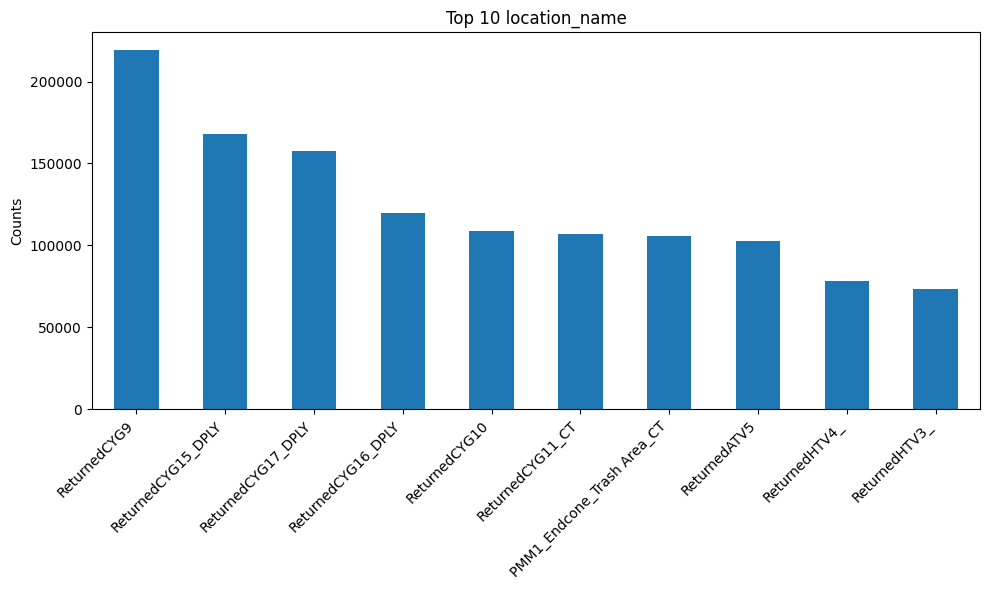

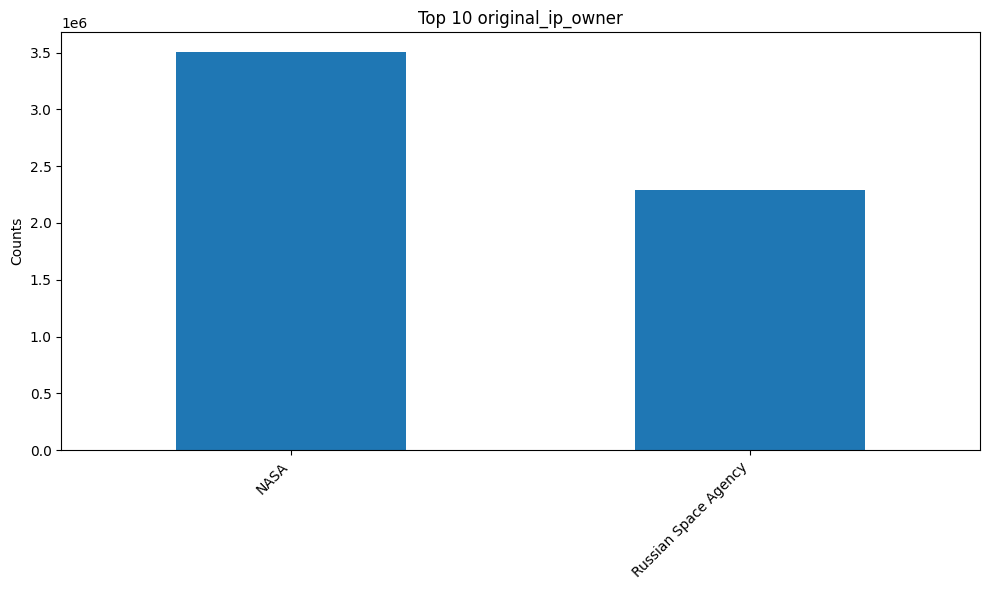

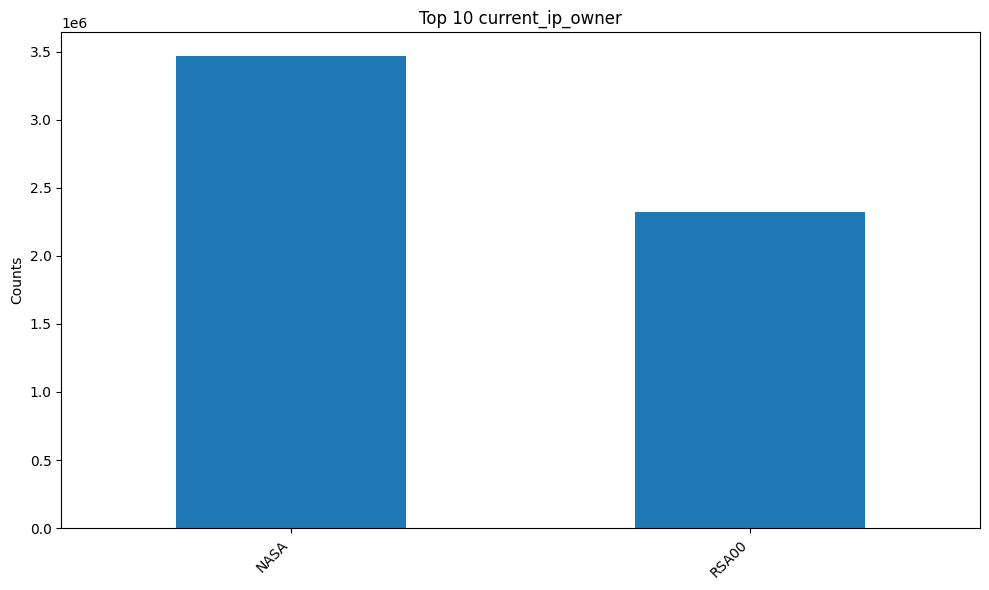

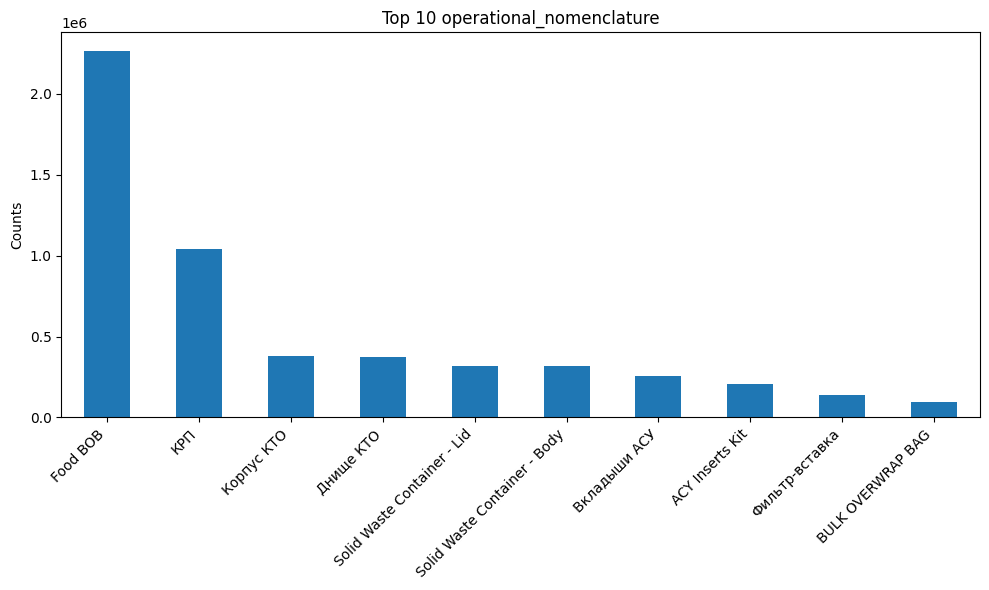

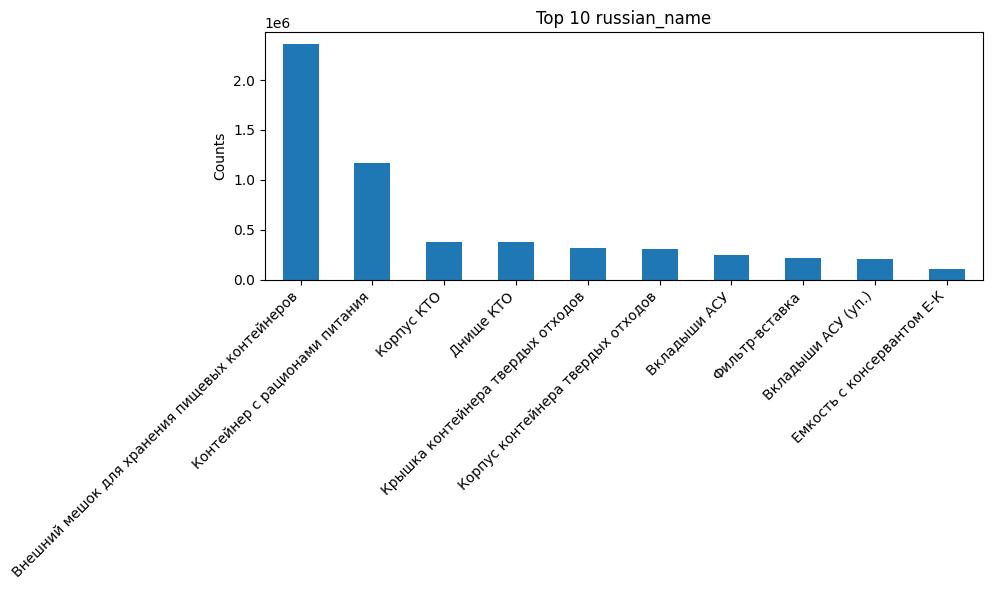

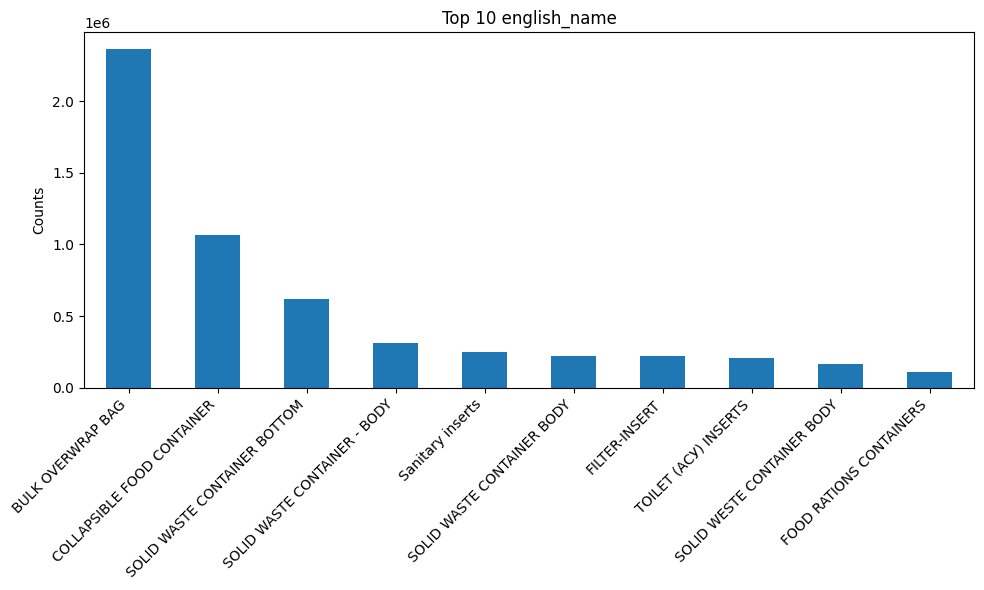

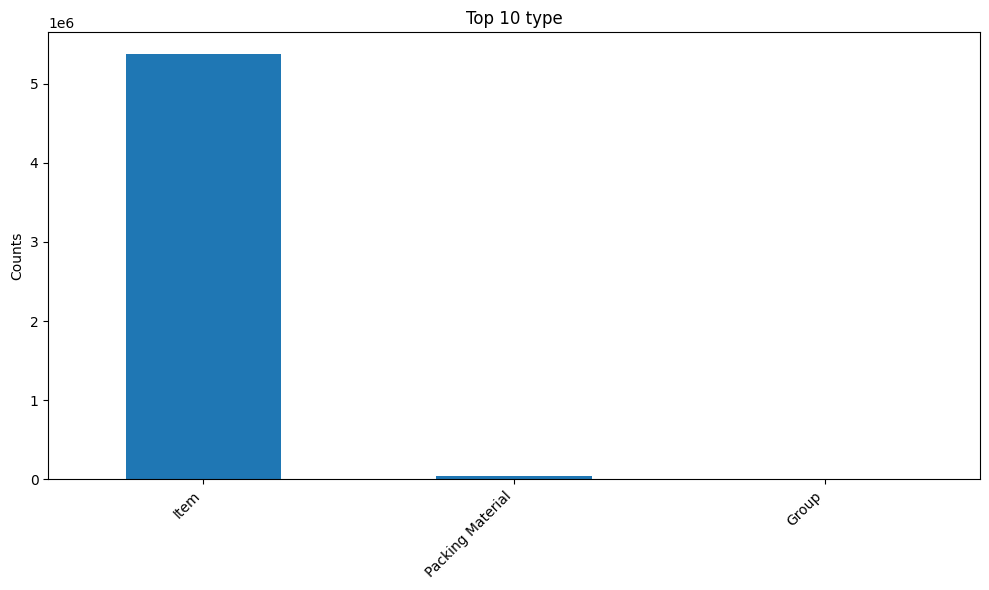

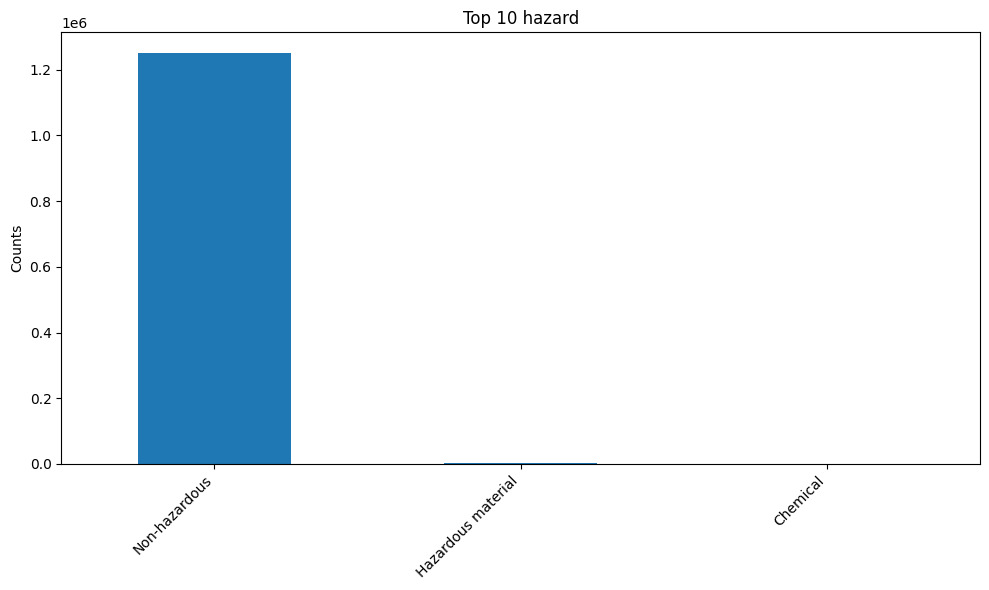

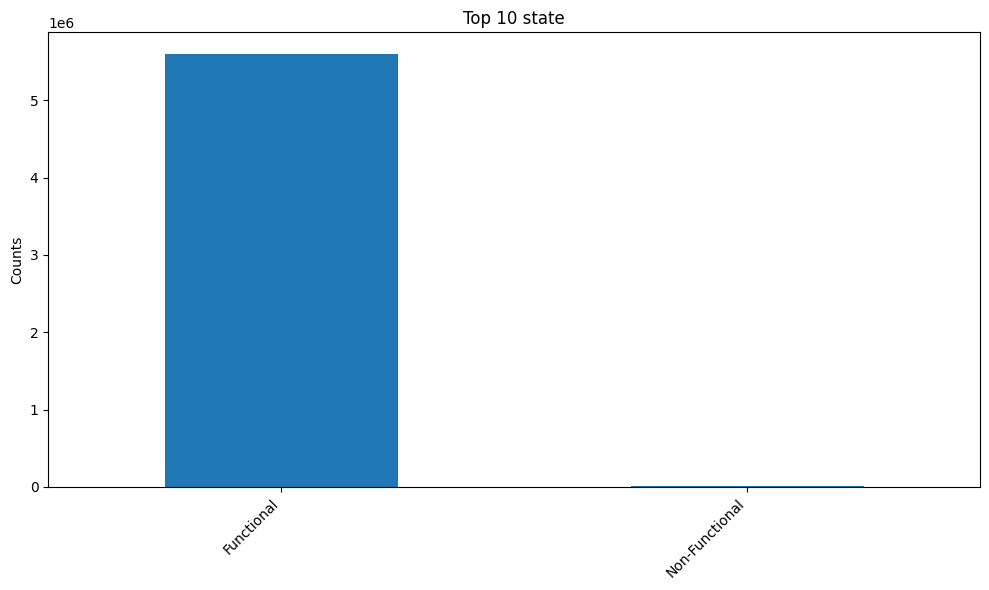

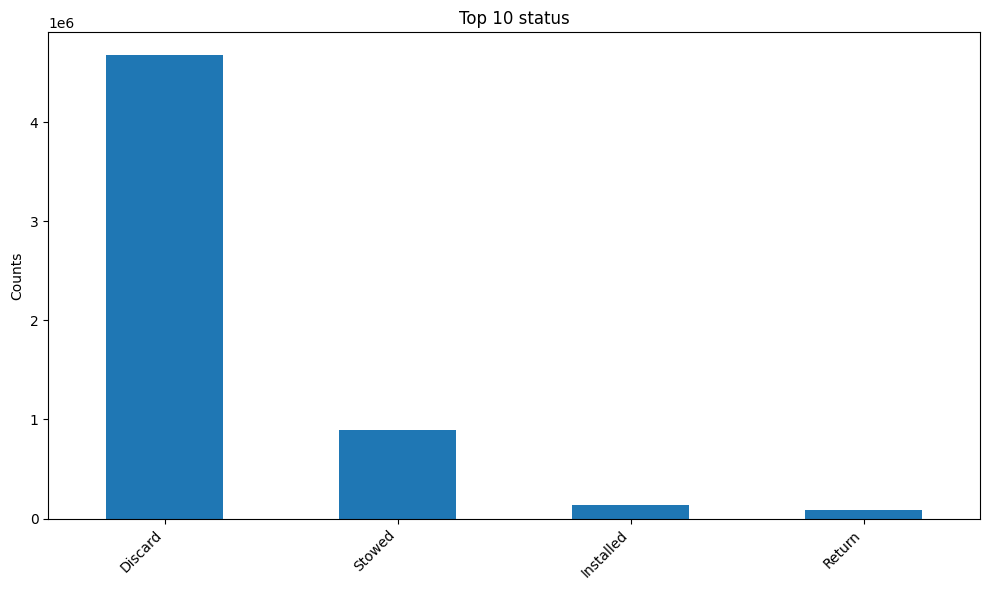

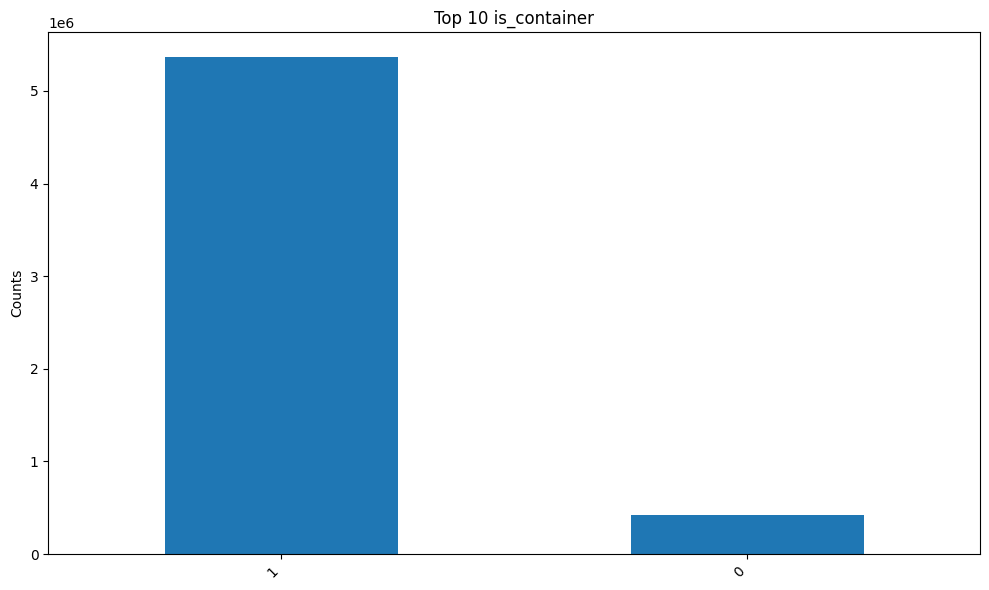

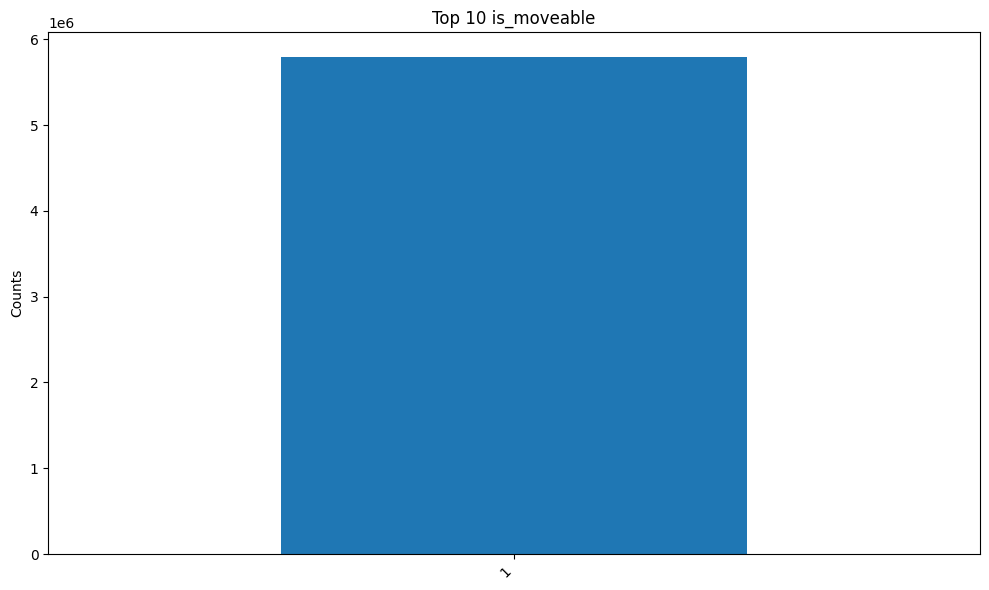

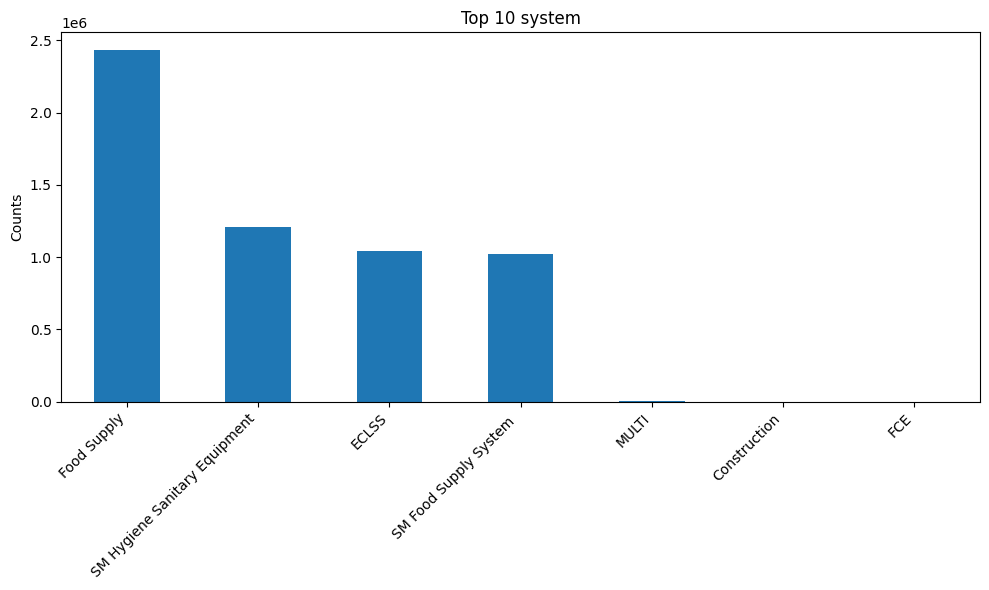

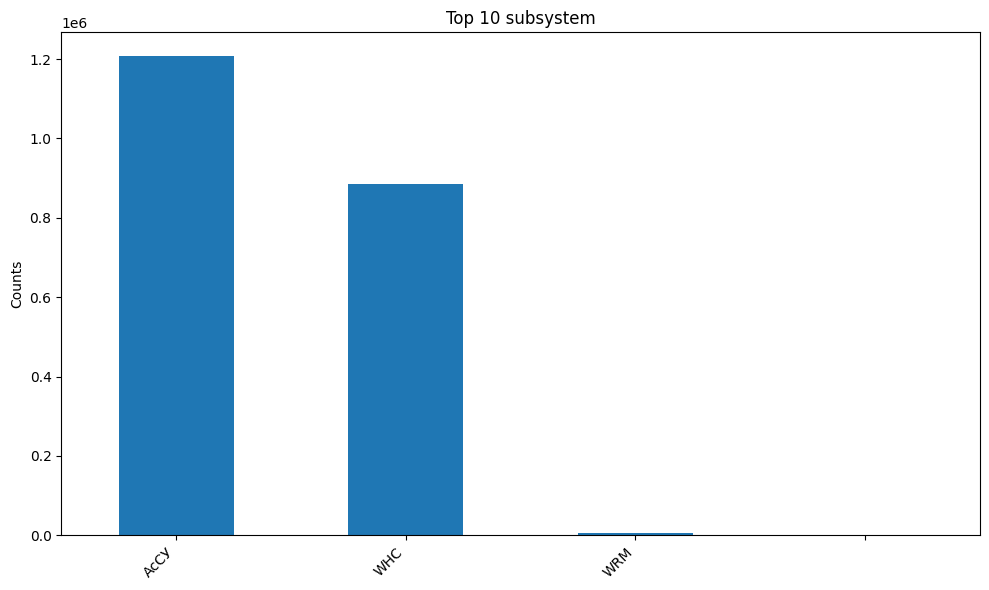

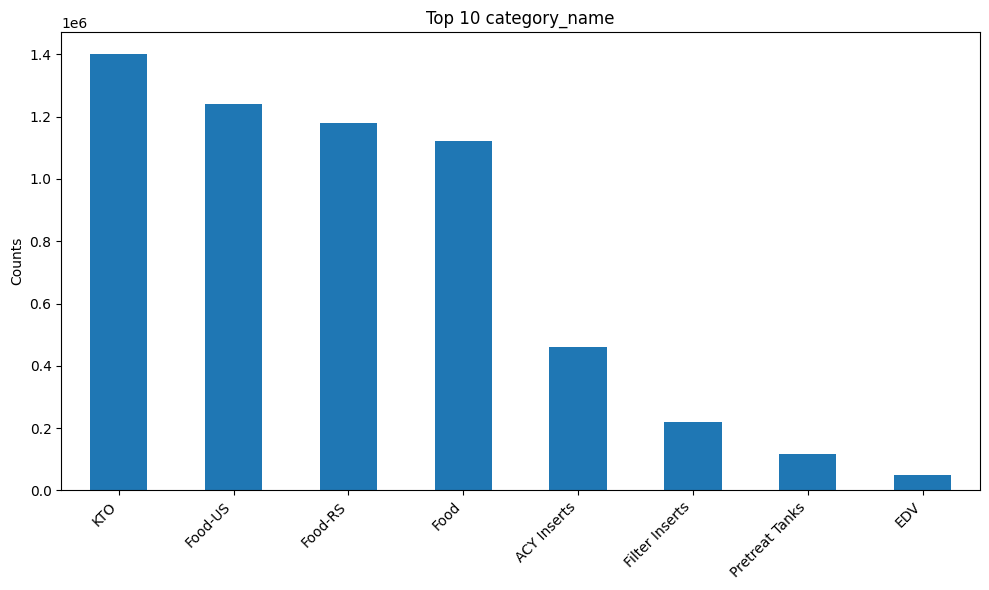

In [ ]:
#Categorical Columns Visualization
#For categorical columns like location_name, original_ip_owner, category_name, etc., you can create bar charts showing the most common categories
import matplotlib.pyplot as plt
categorical_columns = ['location_name', 'original_ip_owner', 'current_ip_owner', 'operational_nomenclature', 'russian_name', 'english_name', 'type', 'hazard', 'state', 'status', 'is_container', 'is_moveable', 'system', 'subsystem', 'category_name']

for column in categorical_columns:
    # Get the top 10 most common values for readability
    top_categories = dfBigBoy[column].value_counts().nlargest(10)
    top_categories.plot(kind='bar', title=f'Top 10 {column}', figsize=(10, 6))
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Bar Chart of Categorical Variables
Purpose: This graph shows the distribution of values across different categories for a selected categorical column, such as category_name.

Hypothetical Insights:

If the bar chart was created for category_name, you might see that certain categories, like "Food-US" or "KTO," dominate the inventory. This indicates areas where inventory management efforts might be most critical.
A bar chart for system might reveal which systems onboard the ISS consume the most resources, guiding logistical planning and resupply missions.

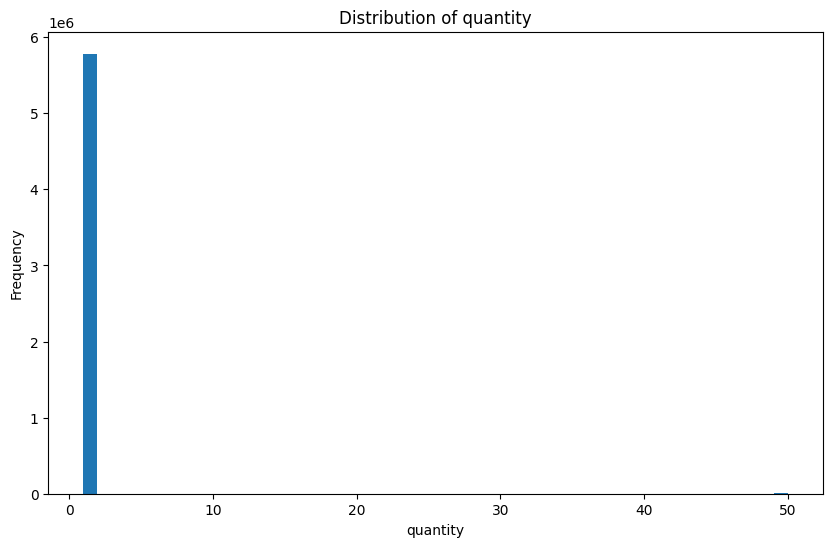

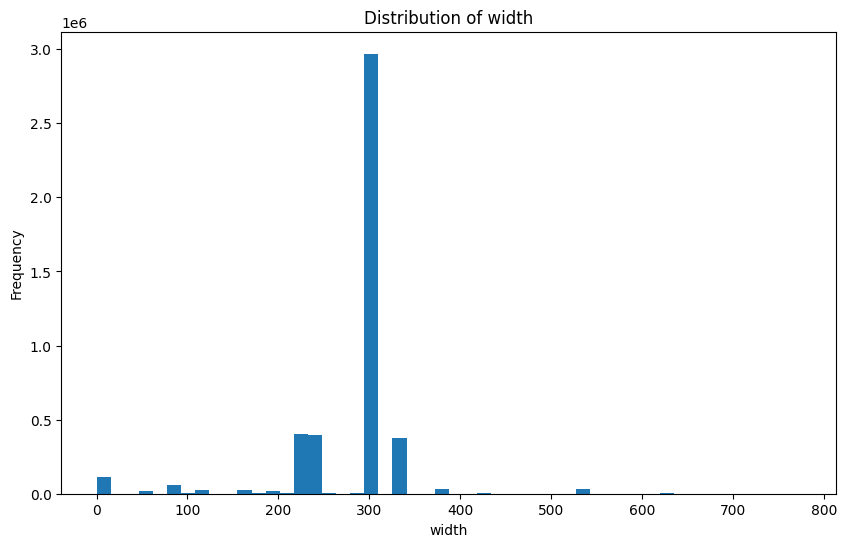

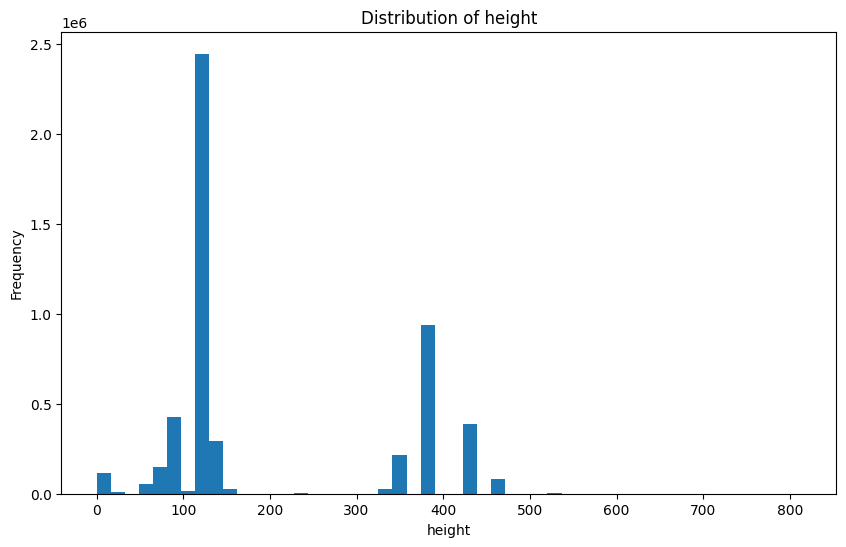

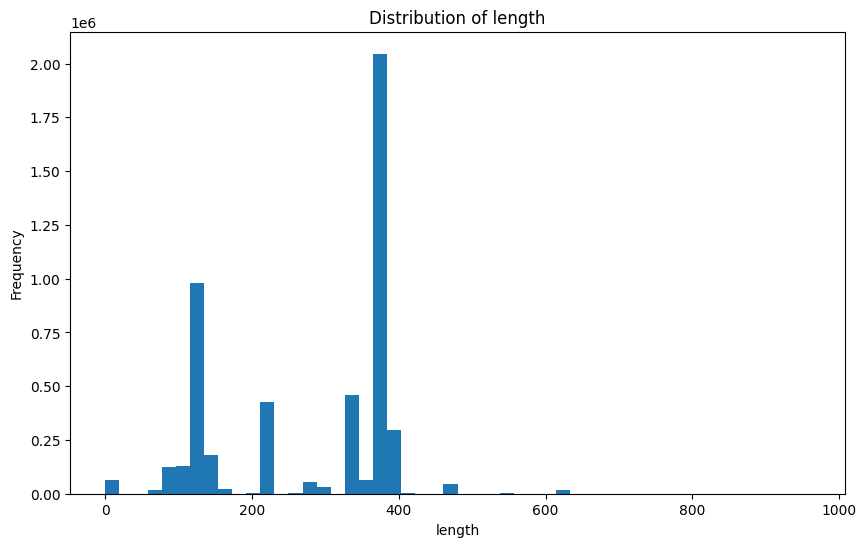

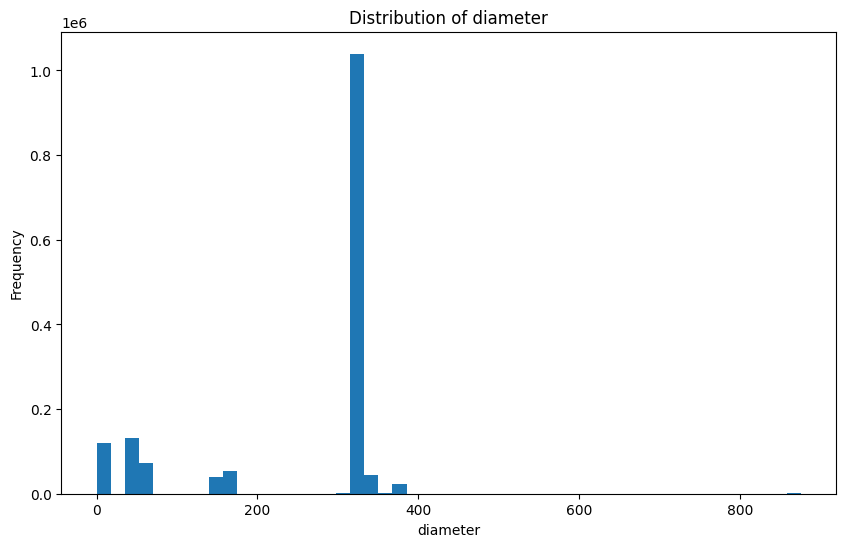

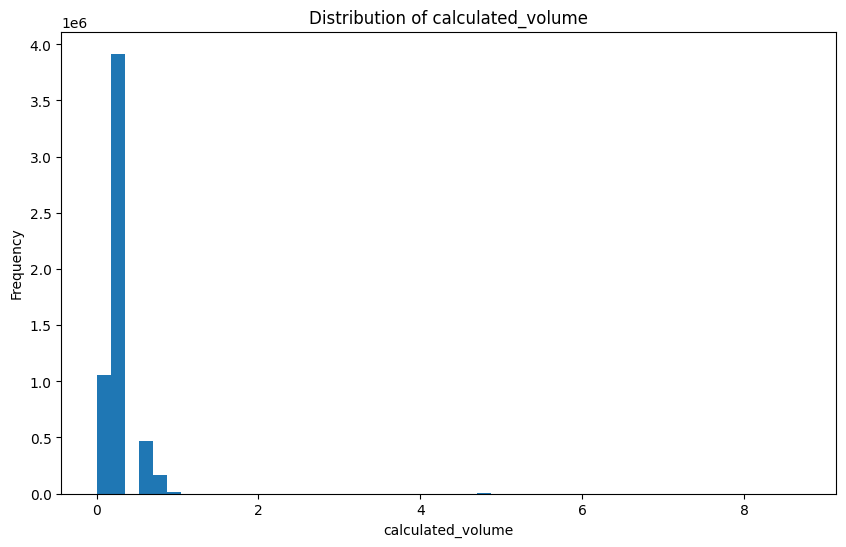

In [ ]:
# Numerical Columns Visualization
numerical_columns = ['quantity', 'width', 'height', 'length', 'diameter', 'calculated_volume']

for column in numerical_columns:
    dfBigBoy[column].plot(kind='hist', bins=50, title=f'Distribution of {column}', figsize=(10, 6))
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


Purpose: Histograms help understand the distribution of numerical data, such as quantity or width.

Hypothetical Insights:

A histogram of quantity might show a right-skewed distribution, indicating that a large number of items have low quantities, with fewer items having very high quantities. This could highlight potential risks of stockouts for many items.
For dimensions like width or height, histograms could reveal common sizes for items, potentially helping in optimizing storage solutions

In [ ]:
dfBigBoy['datedim'] = pd.to_datetime(dfBigBoy['datedim'])
dfBigBoy.set_index('datedim', inplace=True)

# Resampling by month and summing up the quantity for simplicity
dfBigBoy.resample('M')['quantity'].sum().plot(title='Monthly Quantity Over Time', figsize=(12, 6))
plt.ylabel('Total Quantity')
plt.show()


Purpose: This plot visualizes how the total quantity of items changes over time, showing trends, seasonality, or other temporal patterns.

Hypothetical Insights:

If the time series plot shows an upward trend in total quantity over months, it might indicate increasing storage needs, suggesting the ISS is accumulating more items over time.
Seasonal peaks might correspond to known resupply missions or periods of increased activity onboard, which could help in predicting future storage or consumption needs.

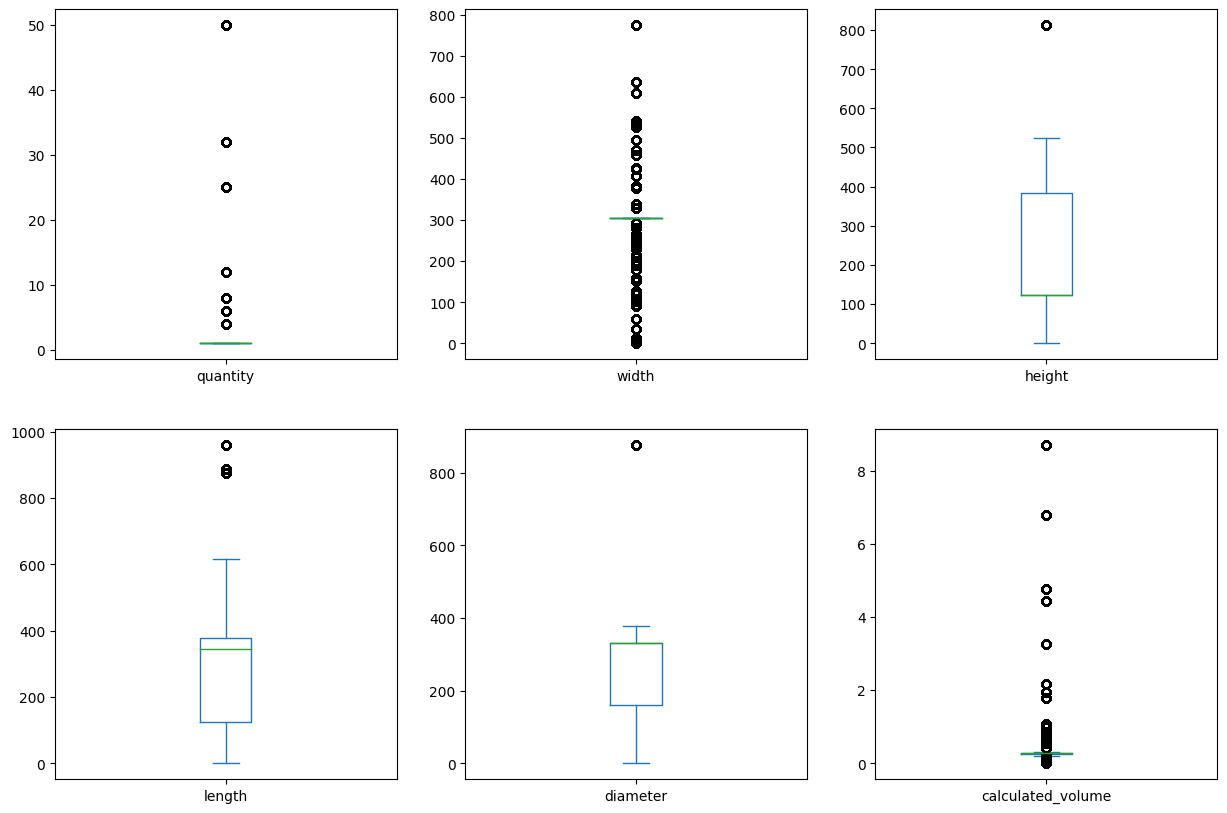

In [ ]:
dfBigBoy[numerical_columns].plot(kind='box', subplots=True, layout=(2,3), figsize=(15, 10))
plt.show()


Box plots provide a visual summary of the distribution of numerical data, highlighting the median, quartiles, and outliers.

Hypothetical Insights:

Box plots for dimensions like width and height could show a wide range of item sizes, with outliers indicating unusually large or small items. This information can be crucial for space optimization and planning.
A box plot for quantity might reveal outliers on both ends, indicating some items are overstocked while others might be at risk of running out, signaling areas where inventory adjustments are needed.

Mean Squared Error: 2.3876146427354836
R^2 Score: 0.011637431865347048


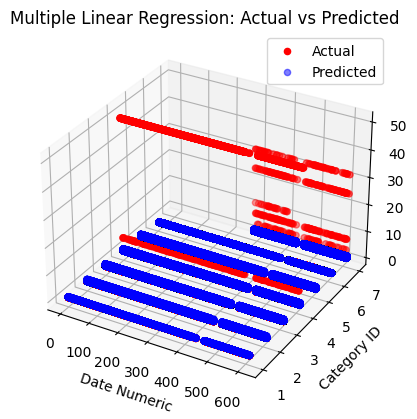

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Assuming dfBigBoy has been prepared with 'date_numeric'
X = dfBigBoy[['date_numeric', 'categoryID', 'is_container']]
y = dfBigBoy['quantity']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Evaluation
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

# Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['date_numeric'], X_test['categoryID'], y_test, color='red', label='Actual')
ax.scatter(X_test['date_numeric'], X_test['categoryID'], y_pred, color='blue', label='Predicted', alpha=0.5)
ax.set_xlabel('Date Numeric')
ax.set_ylabel('Category ID')
ax.set_zlabel('Quantity')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()


Multiple Linear Regression: This model uses date_numeric, categoryID, and is_container to predict the quantity of items. The model's performance is evaluated using MSE and R², and results are visualized in a 3D scatter plot comparing actual to predicted quantities.

Accuracy: 0.9985354994585838


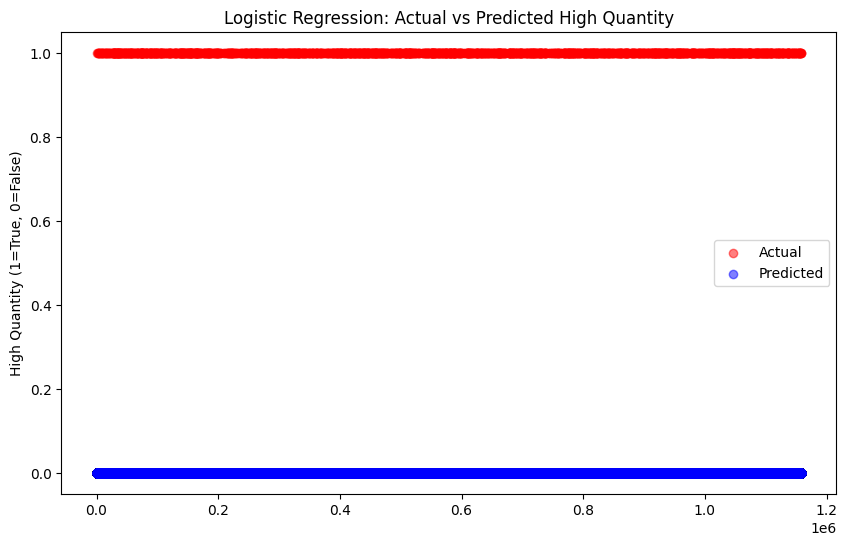

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Creating a binary target variable
median_quantity = dfBigBoy['quantity'].median()
dfBigBoy['high_quantity'] = (dfBigBoy['quantity'] > median_quantity).astype(int)

# Selecting features and the new target
X = dfBigBoy[['date_numeric', 'categoryID', 'is_container']]
y = dfBigBoy['high_quantity']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predicting
y_pred = logistic_model.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Visualization of a subset of the test set predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted', alpha=0.5)
plt.title('Logistic Regression: Actual vs Predicted High Quantity')
plt.ylabel('High Quantity (1=True, 0=False)')
plt.legend()
plt.show()


Logistic Regression: Converts quantity into a binary variable to denote high vs. low quantity. It predicts this binary outcome using the same features as the linear model. The model's accuracy is assessed, and predictions are visualized alongside actual outcomes, illustrating the model's classification performance.